# Lab 5: Model Deployment

At the end of this lab, you will learn how to export a trained machine learning model to reuse it in future classification tasks from python and from interactive web applications.

This lab consists on the following tasks:

1. Load and preprocess an example dataset
1. Create a simple machine learning classifier
1. Export a trained ML model to a computer file.
1. Use the saved model to make predictions over unknown inputs
1. Use the model directly from a web platform.

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Loading the data

Find the dataset in the relative path with respect to the current file.

As an example, we will classify three variaties of wheat seeds (Kama, Rosa, Canadian) from seven real-value attributes extracted from soft X-ray images:

1. area A,
1. perimeter P,
1. compactness C = $\frac{4*\pi*A}{P^2}$,
1. length of kernel LK,
1. width of kernel WK,
1. asymmetry coefficient A_Coef
1. length of kernel groove LKG.

More dataset info in https://archive.ics.uci.edu/ml/datasets/seeds

In [2]:
# Relative path prefix to be able to find the dataset
dataset_filename = "datasets/seed_data.csv"
print(dataset_filename)

datasets/seed_data.csv


In [3]:
data = pd.read_csv(dataset_filename)

## Preprocessing

Since our objective is to show how to use the models in production, we are not going to apply any special preprocessing in the dataset, it is important that you apply a proper preprocessing pipeline to your own homework before exporting the model.

In [4]:
data

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [5]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'C'}>],
       [<AxesSubplot:title={'center':'LK'}>,
        <AxesSubplot:title={'center':'WK'}>,
        <AxesSubplot:title={'center':'A_Coef'}>],
       [<AxesSubplot:title={'center':'LKG'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

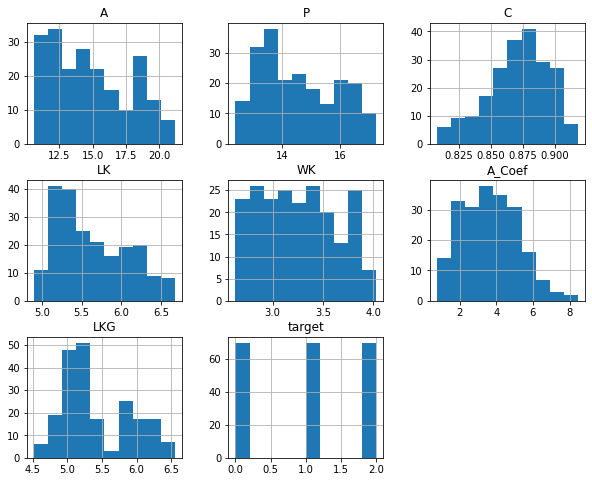

In [6]:
data.hist(figsize = (10, 8))

In [7]:
# Separate in different variables the features and the Class label
X = data.drop('target', axis=1)
Y = data['target']

## Train a classifier using scikit-learn

In this case we are using a support vector classifier with a linear kernel.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=123, stratify=Y)

In [9]:
support_vector_classifier = SVC(kernel='linear')
support_vector_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [10]:
Y_predicted = support_vector_classifier.predict(X_test)

In [11]:
confusion_matrix(Y_test, Y_predicted)

array([[12,  0,  2],
       [ 0, 14,  0],
       [ 2,  0, 12]], dtype=int64)

In [12]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       1.00      1.00      1.00        14
           2       0.86      0.86      0.86        14

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



# Exporting the model

So far, we have created a classifier that is stored the variable `support_vector_classifier`, which has an accuracy of $90\%$.

To export the trained model, we store a file in the hard drive that is going to use for production.

For this purpose, we often use the package `pickle`, which is included by default in Python installation.

In [13]:
import pickle

In [14]:
# DO NOT MODIFY: Relative path prefix to store the files in the 
FOLDER_PATH = "dami_dsv/model_deployment/"

In [15]:
trained_model_filename = FOLDER_PATH + "trained_model_seeds_dataset.pickle"

In [16]:
# CREATE FILE WITH THE SPECIFIC VARIABLE IN THE SPECIFIED FOLDER
data_to_save = support_vector_classifier
file_path = trained_model_filename

In [17]:
# Creates a binary object and writes the indicated variables
with open(file_path, "wb") as writeFile:
    pickle.dump(data_to_save, writeFile)

# Load the model

After the model has been stored, we can load the pickle file and assign it to a new variable.

In [18]:
# Initially trained model
support_vector_classifier

SVC(kernel='linear')

In [19]:
# Here we will load the same model, but in a variable that is completely empty
loaded_model = None

In [20]:
# The path is exactly the same than when we saved the file, it is written here just for clarification.
trained_model_filename

'dami_dsv/model_deployment/trained_model_seeds_dataset.pickle'

In [21]:
# Load model
with open(trained_model_filename, "rb") as readFile:
    loaded_model = pickle.load(readFile)

In [22]:
# Verify that the model has the SVC classifier
loaded_model

SVC(kernel='linear')

`THE MODEL WAS LOADED CORRECTLY FROM THE PICKLE FILE!`

## Make predictions with the loaded trained model

We can evaluate the loaded model to see that the performance metrics are the same than at the beginning

In [23]:
Y_predicted_loaded_model = loaded_model.predict(X_test)

In [24]:
confusion_matrix(Y_test, Y_predicted_loaded_model)

array([[12,  0,  2],
       [ 0, 14,  0],
       [ 2,  0, 12]], dtype=int64)

In [25]:
print(classification_report(Y_test, Y_predicted_loaded_model))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       1.00      1.00      1.00        14
           2       0.86      0.86      0.86        14

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [26]:
# Predict a single sample
#  ["Area", "Perimeter", "Compactness", "Length of Kernel", 
#           "Width of Kernel", "Asymmetry Coeff.", "Length Kernel Groove"]
data_to_classify = [12.3, 13.34, 0.8684, 5.243, 2.974, 5.637, 5.063]

In [27]:
colnames = data.columns
colnames = colnames.drop('target').values
print(colnames)

['A' 'P' 'C' 'LK' 'WK' 'A_Coef' 'LKG']


In [28]:
sample = pd.DataFrame(data = [data_to_classify], columns = colnames)
sample

,A,P,C,LK,WK,A_Coef,LKG
0,12.3,13.34,0.8684,5.243,2.974,5.637,5.063


In [29]:
prediction = loaded_model.predict(sample)
print("The predicted class for one sample is:", prediction[0])

The predicted class for one sample is: 2


# Deploy on a web application

To follow the rest of the lab it is necessary to install the `Dash` package, documentation can be found on https://dash.plotly.com/: `pip install dash==1.13.3`. The specific version (1.13.3) of dash is needed to guarantee compatibility with provided codes.

The next step is to run the following script in the terminal/console:  `python dami_dsv/model_deployment/dash_example_web.py`.

After executing the file, dash will launch a web application in your computer with a message similar to:

``` console
Dash is running on http://127.0.0.1:8050/

 Warning: This is a development server. Do not use app.run_server
 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "dash_example_web" (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: on
```

Leave the code running and open a tab in your internet browser. Access the webpage http://127.0.0.1:8050/ (or the one shown in the prompt before) and you will see an interactable web application that uses the classifier model. To close the application, click on the console/terminal and press `Ctrl+C` multiple times.

# END OF LAB 5